In [60]:
#                                           ------------README------------
#please run the cells sequentially
#the answers to each part are labelled and will be printed when you run the respective cells

import numpy as np
import matplotlib.pyplot as plt
import random

In [61]:
#qn1



#load data
tr_data = pd.read_csv('data/1/train_1_5.csv', header=None,names=['sym','intensity','y'])
ts_data = pd.read_csv('data/1/test_1_5.csv', header=None,names=['sym','intensity','y'])

#split y and x variables
#training
tr_x = tr_data[['sym','intensity']]
tr_y = tr_data['y']
#test
ts_x = ts_data[['sym','intensity']]
ts_y = ts_data['y']

#output: tithe (pd.Series)
#input: iters = iterations (int)
def train_perceptron(iters):
    n = tr_data.shape[0]
    tithe = pd.Series([0,0],['sym','intensity'])
    
    for i in range(iters):
        for j in range(n):
            #get the point risk for this data instance
            pt_risk = tr_x[j:j+1].dot(tithe) * tr_y[j]

            #if mistake occurs, update tithe
            if pt_risk[j] <= 0:
                tithe = tithe + tr_y[j] * tr_x[j:j+1].transpose()[j]
                
    return tithe

#output: accuracy (float)
#input: dat_x = x vals (pd.dataframe), dat_y = y vals (pd.series), tithe (pd.Series)
def get_acc(dat_x, dat_y, tithe):
    n = dat_y.shape[0]
    risk = 0
    for i in range(n):
        pt_risk = dat_x[i:i+1].dot(tithe) * dat_y[i]

        if pt_risk[i] <= 0:
            risk = risk + 1
    avg_risk = risk/n
    acc = 1-avg_risk
    return acc

In [62]:
#part a

#5 iterations
tithe = train_perceptron(5)
acc = get_acc(ts_x, ts_y, tithe)
print('tithe: \n{}\ntest acc: {}'.format(tithe.to_string(),acc))

tithe: 
sym         -1.126949
intensity   -2.930017
test acc: 0.9660678642714571


In [63]:
#10 iterations
tithe = train_perceptron(10)
acc = get_acc(ts_x, ts_y, tithe)
print('tithe: \n{}\ntest acc: {}'.format(tithe.to_string(),acc))

tithe: 
sym         -1.159380
intensity   -3.029941
test acc: 0.9670658682634731


In [64]:
#qn2

#load data
x_dat = pd.read_csv('data/2/hw1x.dat', header=None, names=['x1'])
y_dat = pd.read_csv('data/2/hw1y.dat', header=None, names=['y'])
n = x_dat.shape[0]

#initialise series
x1 = x_dat['x1']
y = y_dat['y']

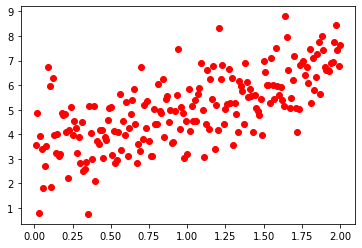

In [65]:
#part a
plt.plot(x1, y, 'ro')

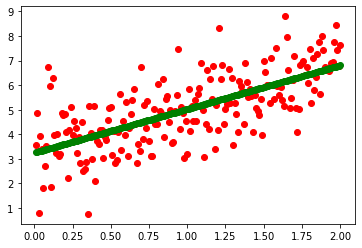

In [66]:
#part b

#add column of 0s to data
x_dat['x0'] = pd.Series([1]*n)

#switch ordering of columns in dataframe x_dat
x_dat = x_dat[['x0','x1']]

#initialise series
x0 = x_dat['x0']

#find tithe
b = x_dat.transpose().dot(y_dat) / n
A = x_dat.transpose().dot(x_dat) / n
A_inv = np.linalg.inv(A)
tithe_arr = A_inv.dot(b)
tithe = pd.DataFrame(tithe_arr,index=['x0','x1'])[0]

#get estimated y (x.tithe)
x_tithe = x_dat.dot(tithe)

#plot
plt.plot(x1, y, 'ro')
plt.plot(x1, x_tithe, 'ro', color='green')
plt.show()

In [67]:
#part c

#output: avg_risk (float)
#input: dat_x = x vals (pd.dataframe), dat_y = y vals (pd.series), tithe (pd.Series)
def get_risk(x_dat, y_dat, tithe):
    x_tithe = x_dat.dot(tithe)
    risk = 0.5*(y_dat - x_tithe)**2
    avg_risk = risk.mean()
    return avg_risk

risk = get_risk(x_dat,y,tithe)
print('tithe:\n{}\nrisk: {}'.format(tithe.to_string(), risk))

tithe:
x0    3.244723
x1    1.781571
risk: 0.5812605752543938


In [68]:
#part d

#output: best_tithe (pd.Series), best_risk (float)
#input: x_dat (pd.DataFrame), y_dat (pd.Series), iters = iterations (int)
def gradient_descent(x_dat, y_dat, iters):
    tithe = pd.Series([0,0],['x0','x1'])
    lr = 0.01
    n = x_dat.shape[0]
    best_tithe=pd.Series([0,0],['x0','x1'])
    best_risk = float('inf')
    
    for i in range(iters):
        for j in range(n):
            x_tithe = x_dat[j:j+1].dot(tithe)
            tithe = tithe +  lr * (y[j]-x_tithe[j]) * x_dat[j:j+1].transpose()[j]
            risk = get_risk(x_dat, y_dat, tithe)

            if risk < best_risk:
                best_risk = risk
                best_tithe = tithe
                
    return best_tithe,best_risk

tithe,risk = gradient_descent(x_dat,y,100)
print('tithe:\n{}\nrisk: {}'.format(tithe.to_string(), risk))

tithe:
x0    3.106384
x1    1.895933
risk: 0.5837141849225412


In [69]:
#part e

#output: best_tithe (pd.Series), best_risk (float)
#input: x_dat (pd.DataFrame), y_dat (pd.Series), iters = iterations (int)
def stoc_gradient_descent(x_dat, y_dat, iters):
    tithe = pd.Series([0,0],['x0','x1'])
    lr = 0.01
    n = x_dat.shape[0]
    best_tithe=pd.Series([0,0],['x0','x1'])
    best_risk = float('inf')

    for i in range(iters):
        for j in range(n):
            r = random.randrange(n)
            x_tithe = x_dat[r:r+1].dot(tithe)
            tithe = tithe +  lr * (y[r]-x_tithe[r]) * x_dat[r:r+1].transpose()[r]
            risk = get_risk(x_dat, y_dat, tithe)
            
            if risk < best_risk:
                best_risk = risk
                best_tithe = tithe
                
    return best_tithe,best_risk

tithe,risk = stoc_gradient_descent(x_dat,y,50)
print('tithe:\n{}\nrisk: {}'.format(tithe.to_string(), risk))

tithe:
x0    3.245135
x1    1.781019
risk: 0.5812606364238345


In [70]:
#part f 

#output: x_dat = new x values (pd.DataFrame), tithe (pd.Series)
#input: x_dat = existing x values (pd.DataFrame), y_dat (pd.Series), d = dimensions (int)
def poly_regress(x_dat,y_dat,d):
    index = ['x0','x1']
    for i in range(d-1):
        x_dat['x{}'.format(i+2)] = x_dat['x1']**(i+2)
        index = index + ['x{}'.format(i+2)]
    print(x_dat.shape[0])    
    b = x_dat.transpose().dot(y_dat) / n
    A = x_dat.transpose().dot(x_dat) / n
    A_inv = np.linalg.inv(A)
    
    tithe_arr = A_inv.dot(b)
    tithe = pd.DataFrame(tithe_arr,index=index)[0]

    return x_dat,tithe

200


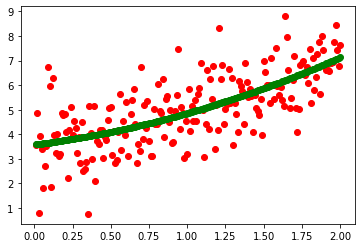

d: 2
risk: 0.5703016121648224

200


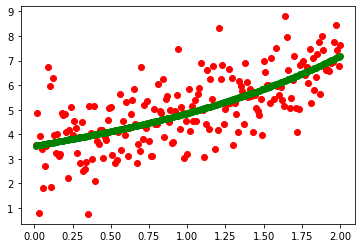

d: 3
risk: 0.5700844364691349

200


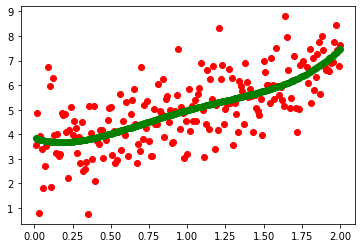

d: 4
risk: 0.5646163879286425

200


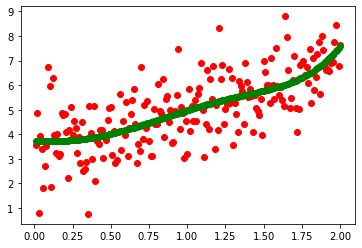

d: 5
risk: 0.5638968184749199

200


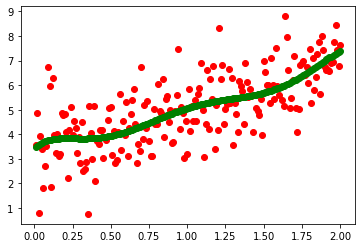

d: 6
risk: 0.5613433038902959

200


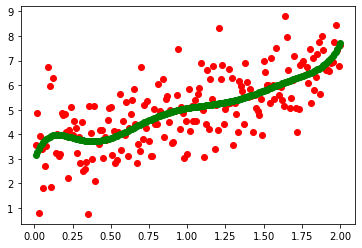

d: 7
risk: 0.5562352515820321

200


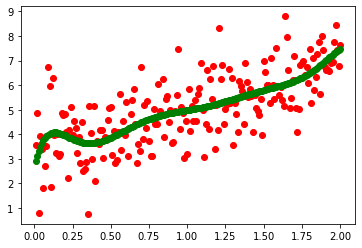

d: 8
risk: 0.5537805799395277

200


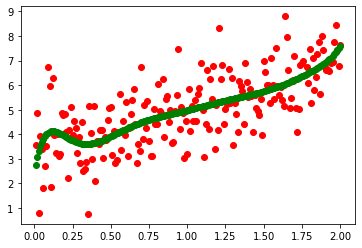

d: 9
risk: 0.5529231118914989

From the graphs, the best fit would be d = 3. Although training risk improves as more dimensions of higher order is added, the validation risk (not calculated here), will do well for low d values but as d gets higher it will start to capture noise (notice kinks in the best fit line) in the training dataset and overfit. Hence validtion risk will first decrease for d < 3, then start to increase


In [71]:
#part g

x_dat = pd.read_csv('data/2/hw1x.dat', header=None, names=['x1'])
x_dat['x0'] = pd.Series([1]*n)
x_dat = x_dat[['x0','x1']]
x1 = x_dat['x1']

#output: x_tithe (pd.Series), avg_risk (float)
#input: x_dat (pd.DataFrame), y_dat (pd.Series), tithe (pd.Series)
def get_xtithe_and_risk(x_dat, y_dat, tithe):
    x_tithe = x_dat.dot(tithe)
    risk = 0.5*(y_dat - x_tithe)**2
    avg_risk = risk.mean()
    return x_tithe,avg_risk

#get risks for different d values (from 2 to 9)
for i in range(8):
    new_x_dat,tithe = poly_regress(x_dat,y_dat,i+2)
    x_tithe,risk = get_xtithe_and_risk(new_x_dat,y,tithe)
    plt.plot(x1, y, 'ro')
    plt.plot(x1, x_tithe, 'ro', color='green')
    plt.show()
    print('d: {}\nrisk: {}\n'.format(i+2,risk))

    
print('From the graphs, the best fit would be d = 3. Although training risk improves as more dimensions of higher order is added, the validation risk (not calculated here), will do well for low d values but as d gets higher it will start to capture noise (notice kinks in the best fit line) in the training dataset and overfit. Hence validtion risk will first decrease for d < 3, then start to increase') 


In [72]:
#qn3

#load data
x = pd.read_csv('data/3/hw1_ridge_x.dat', header=None)
y = pd.read_csv('data/3/hw1_ridge_y.dat', header=None)

#split X and Y datasets
vX = x[0:10]
tX = x[10:40]

vY = y[0:10]
tY = y[10:40]

In [73]:
#part a
#output: tithe_arr (np.ndarray)
#input: tX (pd.DataFrame), tY (pd.DataFrame), l = lambda (float)
def ridge_regression(tX,tY,l):
    n = tX.shape[0]
    d = tX.shape[1]

    xy = tX.transpose().dot(tY)
    iden = np.identity(d) * n * l
    xx = tX.transpose().dot(tX)
    inverse = np.linalg.inv(iden + xx)
    tithe_arr = inverse.dot(xy)
    #tithe = pd.DataFrame(tithe_arr, index=['x3','x2','x1','x0'])[0]
    return tithe_arr

l = 0.15
tithe = ridge_regression(tX,tY,l)
print('tithe:\nx3\t{}\nx2\t{}\nx1\t{}\nx0\t{}'.format(tithe[0][0],tithe[1][0],tithe[2][0],tithe[3][0]))


tithe:
x3	-0.641508326985686
x2	1.1341359502452129
x1	0.06310433165566565
x0	-1.5771396052344329


0.007943282347242814 is the lambda corresponding to lowest vloss


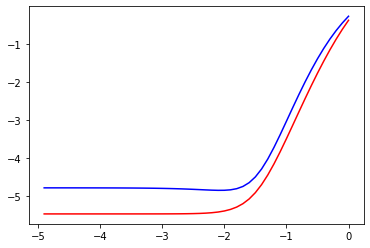

In [74]:
#part b
tn = tX.shape[0]
vn = vX.shape[0]
tloss = []
vloss = []
index = -np.arange(0,5,0.1)

for i in index:
    w = ridge_regression(tX,tY,10**i)
    tloss = tloss +[np.sum((np.dot(tX,w)-tY)**2)/tn/2]
    vloss = vloss + [np.sum((np.dot(vX,w)-vY)**2)/vn/2]
    
plt.plot(index,np.log(tloss),'r')
plt.plot(index,np.log(vloss),'b')

#find lambda that corresponds to min vloss
min = np.amin(np.log(vloss))
idx = 0
for i in range(len(np.log(vloss))):
    if np.log(vloss)[i] == min:
        idx = i
best_l = 10**index[idx]
print('{} is the lambda corresponding to lowest vloss'.format(best_l))